<h1>Encuesta sobre lenguajes de programación y género</h1>

<h2><u>Introducción</u></h2>

una breve introducción de la idea con link a la encuesta. También cargamos los módulos que usaremos

Hace un tiempo en el chat de Télegram de OSL de la UGR (Oficina de Software libre de la Universidad) estuvimos hablando del género en el mundo de la programación y me surgió una duda.

<center><i>¿Hay diferencias de género en el uso de los lenguajes de programación?</i> </center>

Me pareció muy interesante, así que cree un formulario en  [Google Docs](https://docs.google.com/forms/d/1eRi4r4vu5htiCSj5agKJMwcNp2uV7Vu1uTeqnKllGaw). 

La idea era ver como se distribuye el género en los lenguajes de programación. O al menos hacerme una idea ya que con este tipo de encuesta siempre se tienen muchos sesgos. Por ejemplo quién participa ya que al enviarla a personas amigas es muy probable que sean muy similares a mi y no muestren toda la diversidad que hay. También la forma en que está hecha seguro que tiene multiples fallos. Al menos limité a que te tengas que identificar para participar evitando un poco que alguien la haga varias veces.

A pesar de los posibles errores puede servir para hacerse una idea, una primera aproximación.

También he querido aprovechar para aprender [Jupyter](http://jupyter.org) y su notebook. Así el análisis de los datos de la encuesta lo podéis reproducir todos y modificar a vuestro antojo, ¡¡¡¡viva la ciencia libre!!!!. Los datos los podéis hallar en esta [hoja de cálculo de Google](https://docs.google.com/spreadsheets/d/1xFpri9AF6N23vo6J5UUA_d5rY_oeVwpQ-EUBani0O7M)

Lo que veís a continuación es la parte donde cargo las librerías que voy a usar.

In [2]:
# -*- coding: utf-8 -*- 
import requests
import io
import  csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.plotly as py
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
%matplotlib inline

<h2><u>Descripción de los datos obtenidos</u></h2>

Aquí hablamos de cada uno de los campos de la encuesta y para cada uno mostraremos un gráfico con los obtenidos. Primero cargamos los datos de la encuesta

In [3]:
headers={}
headers["User-Agent"]= "Mozilla/5.0 (Windows NT 6.2; WOW64; rv:22.0) Gecko/20100101 Firefox/22.0"
headers["DNT"]= "1"
headers["Accept"] = "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8"
headers["Accept-Encoding"] = "deflate"
headers["Accept-Language"]= "es-ES,en;q=0.5"
headers["Content-Type"]= "application/x-www-form-urlencoded; charset=UTF-8"
lines = []

file_id="1xFpri9AF6N23vo6J5UUA_d5rY_oeVwpQ-EUBani0O7M"
url = "https://docs.google.com/spreadsheets/d/{0}/export?format=csv".format(file_id)

r = requests.get(url)
r.encoding ='utf-8'



data = {}
cols = []
genero_lenguaje = {}
residencia_lenguaje = {}
lenguaje = {}
sio = io.StringIO( r.text, newline=None)
reader = csv.reader(sio, dialect=csv.excel)
rownum = 0

for row in reader:
    if rownum == 0:
        for col in row:
            col=col.upper();
            col=col.strip();
            data[col] = ''
            cols.append(col)
        

    else:
        orden_columnas=[0,1,3,2]
        for i in orden_columnas:
            col=row[i];
            col=col.upper()
            col=col.strip();
            data[cols[i]] = col
            if (i==1):
                if (not col in genero_lenguaje):
                    genero_lenguaje[col]={}
            elif (i==2):
                genero=data[cols[i-1]]
                residencia=data[cols[i+1]]
                if (col in genero_lenguaje[genero]):
                    genero_lenguaje[genero][col]+=1
                else:
                    genero_lenguaje[genero][col]=1;
                if (col in residencia_lenguaje[residencia]):
                    residencia_lenguaje[residencia][col]+=1
                else:
                    residencia_lenguaje[residencia][col]=1;
                if (not col in lenguaje):
                    lenguaje[col]=1;
                else:
                    lenguaje[col]+=1;
            elif (i==3):
                if (not col in residencia_lenguaje):
                    residencia_lenguaje[col]={}
                
    rownum = rownum + 1

generos=genero_lenguaje.keys();
residencias=residencia_lenguaje.keys();
lenguajes=lenguaje.keys();
#ordenamos alfabéticamente
generos=sorted(generos)
residencias=sorted(residencias)
lenguajes=sorted(lenguajes)

<h3>Género</h3>

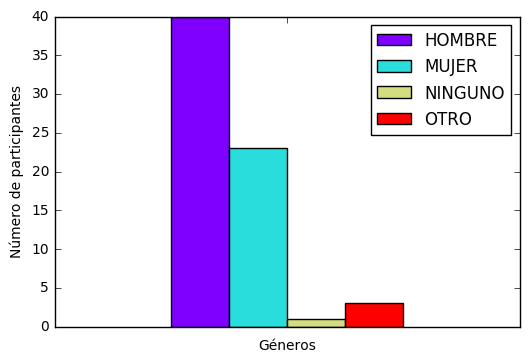

In [4]:
#gráfico de barras de cada genero
cantidad_genero={};
colors = cm.rainbow(np.linspace(0, 1, len(generos)))
for g in generos:
    datas=genero_lenguaje[g];
    total=sum(datas.values());
    cantidad_genero[g]=total;
df = pd.DataFrame(data=cantidad_genero,index=[""],columns=generos)
df.head()
genero_plot = df.plot(kind='bar',label='Gráfico de barras de cada genero',color=colors)
genero_plot.set_ylabel("Número de participantes")
genero_plot.set_xlabel("Géneros")
pass

<h3>Residencia</h3>

In [ ]:
Aquí no he filtrado ni he agrupado lugares. Son datos en bruto.

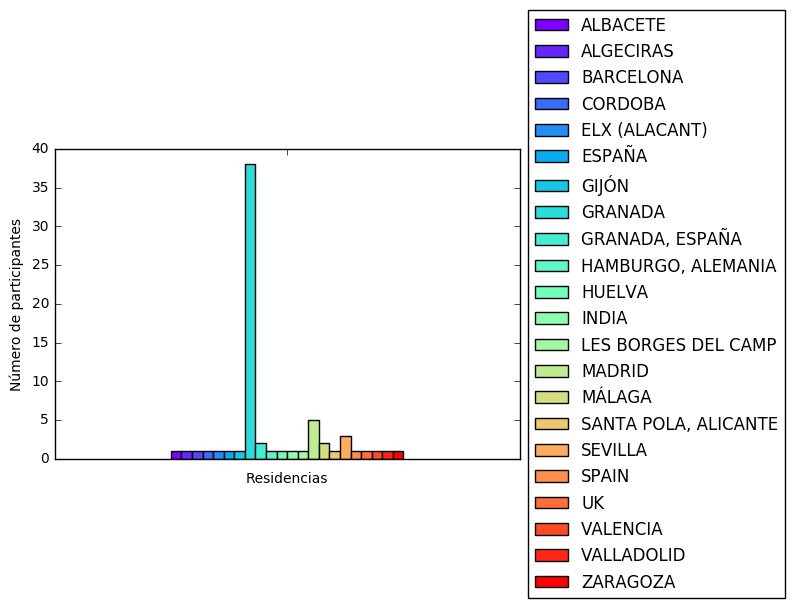

In [5]:
#gráfico de barras de cada residencia
cantidad_residencia={};
colors = cm.rainbow(np.linspace(0, 1, len(residencias)))
for g in residencias:
    datas=residencia_lenguaje[g];
    total=sum(datas.values());
    cantidad_residencia[g]=total;
df = pd.DataFrame(data=cantidad_residencia,index=[""],columns=residencias)
df.head()
residencia_plot = df.plot(kind='bar',label='Gráfico de barras de cada residencia',color=colors)
residencia_plot.set_ylabel("Número de participantes")
residencia_plot.set_xlabel("Residencias")
residencia_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
pass

<h3>Lenguajes de programación</h3>

Aquí no he agrupado lenguajes que podrían ser el mismo como Node.js y javascript.

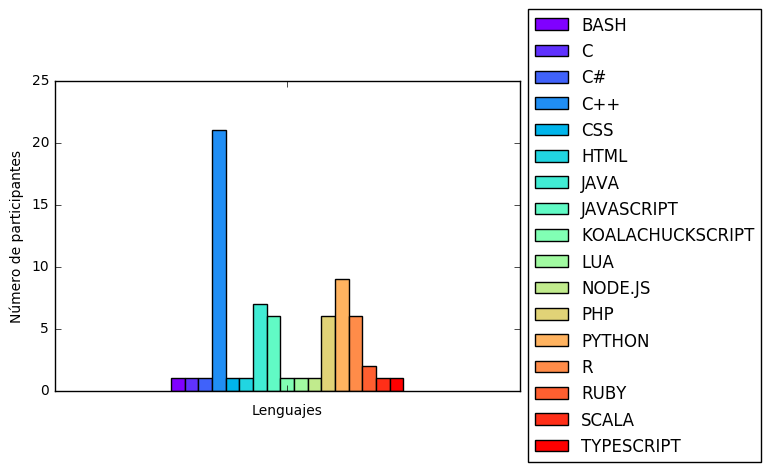

In [6]:
#gráfico de barras de lenguajes de programación
colors = cm.rainbow(np.linspace(0, 1, len(lenguajes)))
df = pd.DataFrame(data=lenguaje,index=[""],columns=lenguajes)
df.head()
lengua_plot = df.plot(kind='bar',label='Gráfico de barras de cada lenguaje',color=colors)
lengua_plot.set_ylabel("Número de participantes")
lengua_plot.set_xlabel("Lenguajes")
lengua_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
pass

<h2>Género y lenguajes</h2>

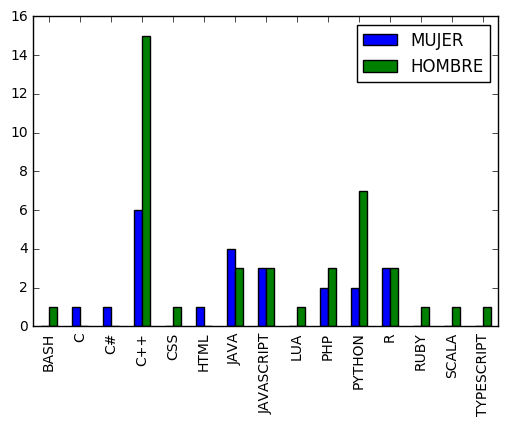

In [42]:



d=[{'MUJER':genero_lenguaje['MUJER']['C++'],'HOMBRE':genero_lenguaje['HOMBRE']['C++']}]

df = pd.DataFrame(data=genero_lenguaje,columns=['MUJER','HOMBRE'])
df.head()
my_plot = df.plot(kind='bar')